In [1]:
# Author: Chidura Santosh
# Importing required Libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

In [2]:
# Loading Data and creating data frame with the data
boston = load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets=boston.target

In [3]:
#Displaying the first 5 header records
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#summary of the boston data statistics
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
# To display the information of teh data frame
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
# To check and display the sum of null values 
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

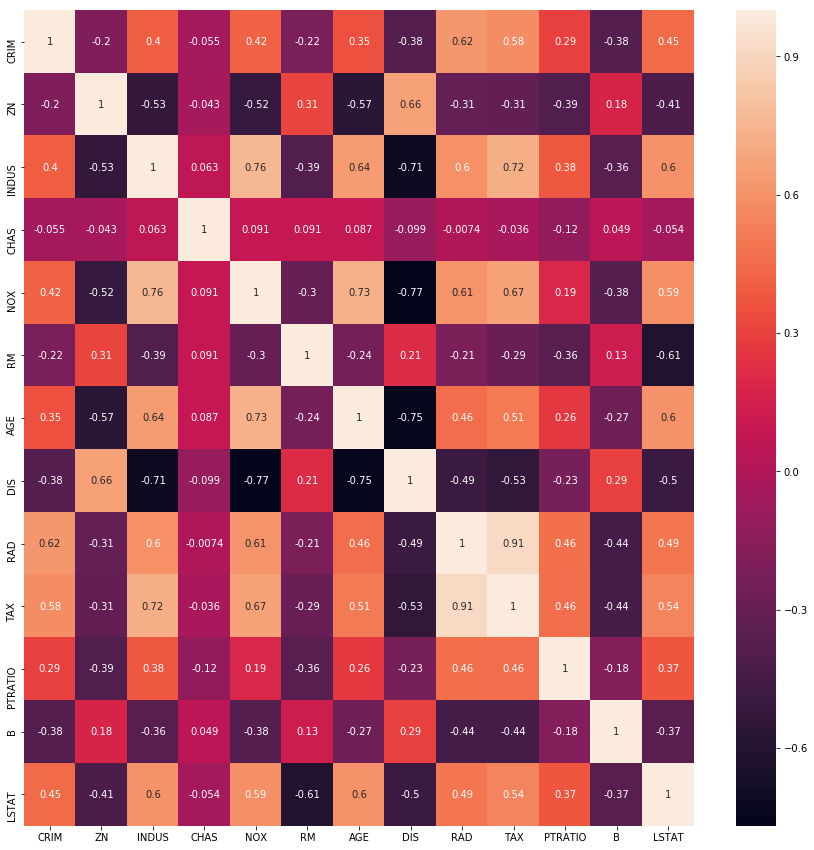

In [7]:
# Creating heat map for data visualization with correlation and coefficients

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=features.corr(), annot=True)

In [8]:
#from the above Heat map RM and lstat have higher positive and negative corelation with price values 
#RAD TAX have high multi colinearity same goes with DIS and age,dis and nox column values
# displaying all the column names
features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

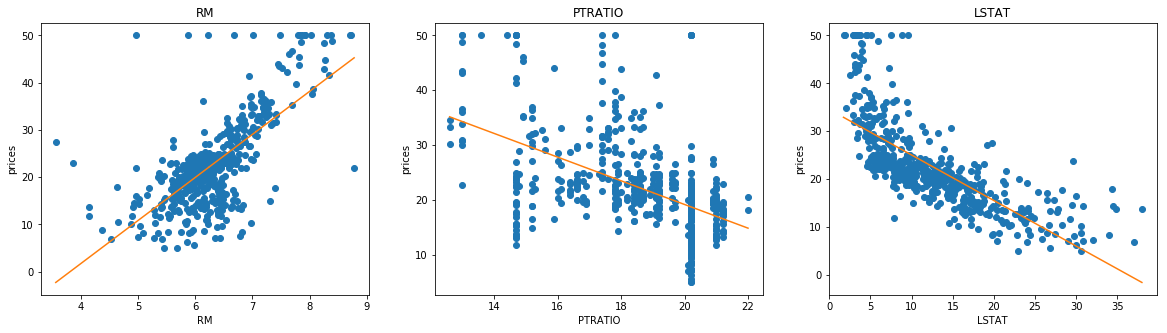

In [9]:
# Plotting the 'RM','PTRATIO','LSTAT' against Proce
plt.figure(figsize=(20, 5))

# iterating for each column 'RM','PTRATIO','LSTAT'
for i, col in enumerate(['RM','PTRATIO','LSTAT']):
    plt.subplot(1, 3, i+1)
    x = features[col]
    y = targets
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [10]:
# Creating different sizes of room based on their sizes using Quantile-based discretization function 

dd=pd.qcut(features.RM,q=[0, .25, .5, .75, 1.])
pd.Categorical(dd)
dd=pd.get_dummies(dd,prefix='RM_')
dd=dd.rename(index=str, columns={"RM__(3.56, 5.885]":"Very_Small_room","RM__(5.885, 6.208]": "Small_room", "RM__(6.208, 6.624]": "Medium_room","RM__(6.624, 8.78]":"Large_room"})
features.index=dd.index
features['Very_Small_room']=dd['Very_Small_room']
features['Small_room']=dd['Small_room']
features['Medium_room']=dd['Medium_room']
features['Large_room']=dd['Large_room']

In [11]:
# Creating different status using Quantile-based discretization function
dd=pd.qcut(features.LSTAT,q=[0, .25, .5, .75, 1.])
pd.Categorical(dd)
dd=pd.get_dummies(dd,prefix='status_')
dd=dd.rename(index=str, columns={"status__(1.729, 6.95]":"Least_lower_Status","status__(6.95, 11.36]": "Medium_lower_Status", "status__(11.36, 16.955]": "lower_Status","status__(16.955, 37.97]":"Majorly_lower_Status"})
features.index=dd.index
features['Majorly_lower_Status']=dd['Majorly_lower_Status']
features['lower_Status']=dd['lower_Status']
features['Medium_lower_Status']=dd['Medium_lower_Status']
features['Least_lower_Status']=dd['Least_lower_Status']

In [12]:
# Creating Independent(X) and Dependent(Target-Y) data frames
X = features[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',  'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'Very_Small_room', 'Small_room',
       'Medium_room', 'Large_room','Majorly_lower_Status', 'lower_Status',
       'Medium_lower_Status', 'Least_lower_Status']]
Y = targets

# Random Forest :

In [13]:
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, RandomizedSearchCV
import pickle

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
#imputing null value of each column with the mean of that column
imput = Imputer()
X_train = imput.fit_transform(X_train)
X_test = imput.fit_transform(X_test)

In [16]:
#Initialization for random forest
pipe = make_pipeline(StandardScaler(),
                     RandomForestRegressor(n_estimators=500, random_state=123))

cv = ShuffleSplit(test_size=0.2, random_state=0)

param_grid = {'randomforestregressor__max_features':['sqrt', 'log2', 10],
              'randomforestregressor__max_depth':[9, 11, 13]}                 

grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)

In [17]:
#finding feature_importance for feature selection. from it we'll be able to decide threshold value
model = XGBRegressor()
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.19127516 0.02013423 0.02516779 0.00503356 0.06040268 0.10067114
 0.15939598 0.02181208 0.06711409 0.06040268 0.11912752 0.02013423
 0.00167785 0.01174497 0.03691275 0.03020134 0.00671141 0.02013423
 0.04194631]


In [18]:
selection = SelectFromModel(model, threshold=0.01, prefit=True)
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)
# deviding train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
grid.fit(select_X_train, y_train)          #training 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...imators=500, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['sqrt', 'log2', 10], 'randomforestregressor__max_depth': [9, 11, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
grid.best_params_

{'randomforestregressor__max_depth': 9,
 'randomforestregressor__max_features': 'sqrt'}

In [20]:
Randfor_reg = pickle.dumps(grid)

In [21]:
Randfor_reg = pickle.loads(Randfor_reg)
print("""RandomForest regressor accuracy is {ran}""".format(ran=Randfor_reg.score(select_X_test, y_test)))

RandomForest regressor accuracy is 0.7990931731692065
